## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
x_train.shape

(60000, 28, 28)

### Find no.of samples are there in training and test datasets

In [7]:
x_test.shape

(10000, 28, 28)

In [0]:
""

### Find dimensions of an image in the dataset

In [5]:
x_train.shape

(60000, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
y_train=tf.keras.utils.to_categorical(
    y_train,
    num_classes=10
)

In [0]:
y_test=tf.keras.utils.to_categorical(
    y_test,
    num_classes=10
)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train=x_train/255
x_test=x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [31]:
# Define model
    model2 = Sequential()
     #1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))
    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))
# Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))
    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               2359424   
_________________________________________________________________
activation_27 (Activation)   (None, 128)              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [32]:
# Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]
    # Train the model2
    model2.fit(x_train, y_train, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    
#batch_size=BATCH_SIZE,


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 23s 389us/step - loss: 0.6781 - acc: 0.7478 - val_loss: 0.5560 - val_acc: 0.7938
Epoch 2/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.4641 - acc: 0.8315 - val_loss: 0.4640 - val_acc: 0.8359
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.4114 - acc: 0.8515 - val_loss: 0.4118 - val_acc: 0.8570
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.3749 - acc: 0.8649 - val_loss: 0.3858 - val_acc: 0.8656
Epoch 5/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.3483 - acc: 0.8733 - val_loss: 0.3804 - val_acc: 0.8602
Epoch 6/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.3248 - acc: 0.8804 - val_loss: 0.3596 - val_acc: 0.8645
Epoch 7/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.3043 - acc: 0.8873 - val_los

In [36]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)


10000/10000 [==============================] - 0s 50us/step
[0.3123854186415672, 0.8909]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [35]:
# Define model
    model3 = Sequential()
     #1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))
    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

# Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model3.add(Dropout(0.25))
    
    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model3.fit(x_train, y_train, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.7511 - acc: 0.7215 - val_loss: 0.5650 - val_acc: 0.7895
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.5452 - acc: 0.7979 - val_loss: 0.5366 - val_acc: 0.8032
Epoch 3/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.4909 - acc: 0.8169 - val_loss: 0.4765 - val_acc: 0.8275
Epoch 4/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.4542 - acc: 0.8329 - val_loss: 0.4447 - val_acc: 0.8394
Epoch 5/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.4185 - acc: 0.8458 - val_loss: 0.4028 - val_acc: 0.8596
Epoch 6/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.3860 - acc: 0.8592 - val_loss: 0.3817 - val_acc: 0.8599
Epoch 7/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.3571 - acc: 0.8690 - val_loss: 0.3439 - 

In [38]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)



10000/10000 [==============================] - 1s 51us/step
[0.31490609166622163, 0.8873]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

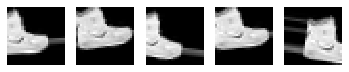

In [67]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [68]:
model3.fit_generator(datagen.flow(x_train, y_train),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  13/1875 [..............................] - ETA: 19s - loss: 3.4360 - acc: 0.1562

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 20s 11ms/step - loss: 1.3197 - acc: 0.5184 - val_loss: 0.6345 - val_acc: 0.7796
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.9545 - acc: 0.6510 - val_loss: 0.6103 - val_acc: 0.7732
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8771 - acc: 0.6810 - val_loss: 0.5891 - val_acc: 0.7780
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8335 - acc: 0.6929 - val_loss: 0.6014 - val_acc: 0.7691
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8020 - acc: 0.7060 - val_loss: 0.5853 - val_acc: 0.7825
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7835 - acc: 0.7132 - val_loss: 0.5641 - val_acc: 0.7884
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7649 - acc: 0.7203 - val_loss: 0.5940 - val_acc: 0.7796
Epoch 8/10
1875/1875 [==============================] - 19s

###  Report the final train and validation accuracy

In [69]:
loss_and_metrics = model3.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 3s 53us/step
[0.5775076517422993, 0.77275]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### **Load CIFAR10 dataset**

In [71]:
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
x_train= x_train/255
x_test= x_test/255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

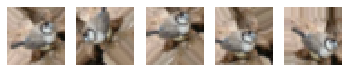

In [90]:
gen = datagen.flow(x_train[90:91], batch_size=1)
for i in range(1, 6):
    plt.subplot(2,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()